# Visualizing Two Compensation Plans

You're offered a job with a 10,000 base salary  
Two options for raises  

A 500 raise every 6 months  
A 2000 raise every year  

Which payment plan pays more?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

MONTHS = 12 * 5

df = pd.DataFrame({
    'month': range(1, MONTHS + 1)
})

def get_plan_a_raise(month_num):
    raise_num = (month_num - 1) // 6
    return (raise_num * 500) / 6

def get_plan_b_raise(month_num):
    raise_num = (month_num - 1) // 12
    return (raise_num * 2000) / 12
    
df['base_rate'] = round(10000 / 12, 2)
df['plan_a_inc_rate'] = df['month'].apply(get_plan_a_raise).apply(lambda x: round(x, 2))
df['plan_b_inc_rate'] = df['month'].apply(get_plan_b_raise).apply(lambda x: round(x, 2))

df['plan_a_income'] = df['base_rate'] + df['plan_a_inc_rate']
df['plan_b_income'] = df['base_rate'] + df['plan_b_inc_rate']

df['plan_a_cumulative_income'] = df['plan_a_income'].cumsum()
df['plan_b_cumulative_income'] = df['plan_b_income'].cumsum()


df.loc[df['month'] % 6 == 0]

,month,base_rate,plan_a_inc_rate,plan_b_inc_rate,plan_a_income,plan_b_income,plan_a_cumulative_income,plan_b_cumulative_income
5,6,833.33,0.00,0.00,833.33,833.33,4999.98,4999.98
11,12,833.33,83.33,0.00,916.66,833.33,10499.94,9999.96
17,18,833.33,166.67,166.67,1000.00,1000.00,16499.94,15999.96
23,24,833.33,250.00,166.67,1083.33,1000.00,22999.92,21999.96
29,30,833.33,333.33,333.33,1166.66,1166.66,29999.88,28999.92
35,36,833.33,416.67,333.33,1250.00,1166.66,37499.88,35999.88
41,42,833.33,500.00,500.00,1333.33,1333.33,45499.86,43999.86
47,48,833.33,583.33,500.00,1416.66,1333.33,53999.82,51999.84
53,54,833.33,666.67,666.67,1500.00,1500.00,62999.82,60999.84
59,60,833.33,750.00,666.67,1583.33,1500.00,72499.80,69999.84


## Visualize Cumulative Income Over a Period of Five Years

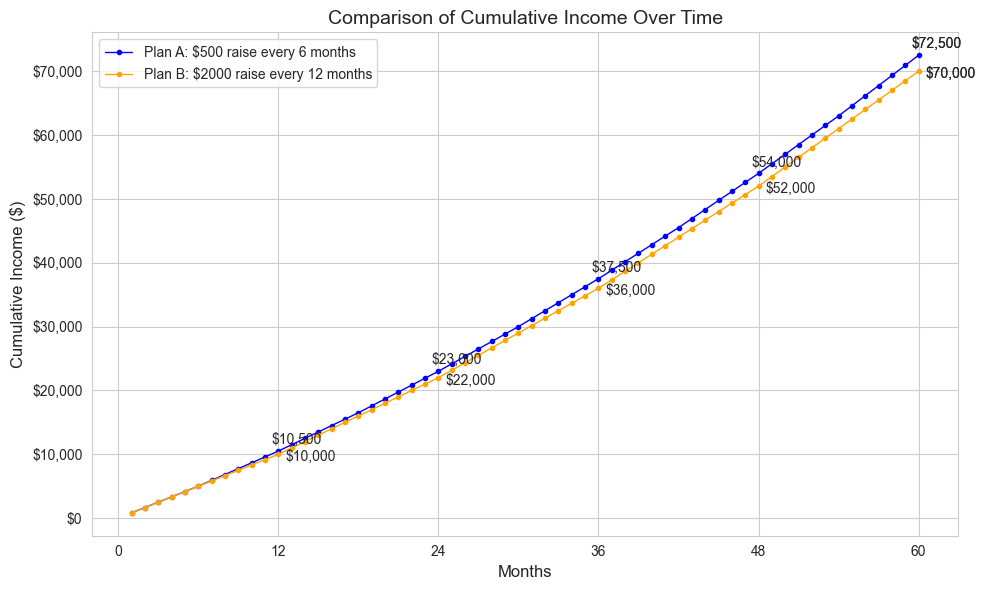

In [2]:
# Set up the figure
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the line plot
plt.plot(df['month'], df['plan_a_cumulative_income'], '.-', color='blue', linewidth=1, 
         label='Plan A: $500 raise every 6 months')
plt.plot(df['month'], df['plan_b_cumulative_income'], '.-', color='orange', linewidth=1, 
         label='Plan B: $2000 raise every 12 months')

# Add labels and title
plt.xlabel('Months', fontsize=12)
plt.ylabel('Cumulative Income ($)', fontsize=12)
plt.title('Comparison of Cumulative Income Over Time', fontsize=14)
plt.xticks(range(0, MONTHS + 12, 12))  # Set x-axis ticks to match the period values

# Add dollar values at the end of each line

for i in range(11, MONTHS + 12, 12):
    if i >= MONTHS:
        last_idx = -1
    else:
        last_idx = i
    plt.annotate(f"${df['plan_a_cumulative_income'].iloc[last_idx]:,.0f}", 
                 xy=(df['month'].iloc[last_idx], df['plan_a_cumulative_income'].iloc[last_idx]),
                 xytext=(-5, 5), textcoords='offset points')
    
    plt.annotate(f"${df['plan_b_cumulative_income'].iloc[last_idx]:,.0f}", 
                 xy=(df['month'].iloc[last_idx], df['plan_b_cumulative_income'].iloc[last_idx]),
                 xytext=(5, -5), textcoords='offset points')

# Add legend
plt.legend(loc='best')

# Format y-axis with dollar signs and commas
import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()

## Visualize Monthly Pay Rate Over a Period of Five Years

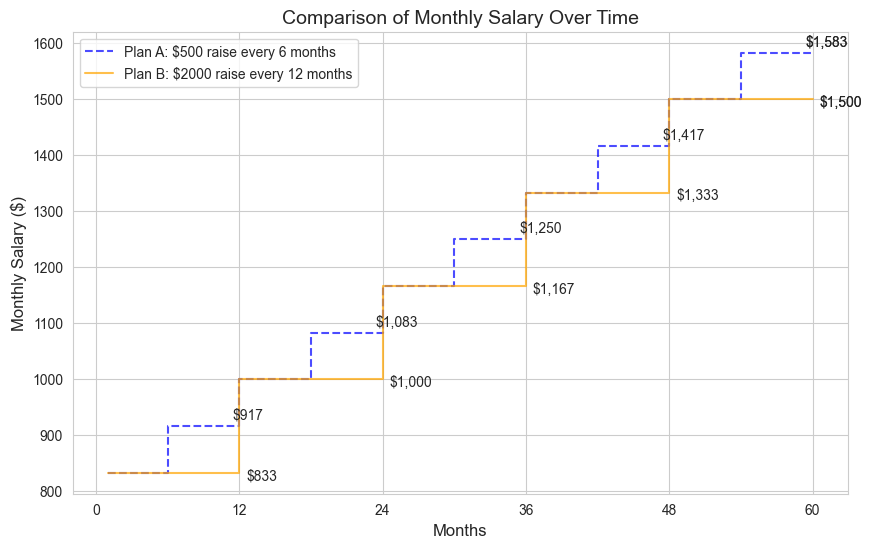

In [3]:
df['plan_a_rate'] = df['base_rate'] + df['plan_a_inc_rate']
df['plan_b_rate'] = df['base_rate'] + df['plan_b_inc_rate']

# Set up the figure
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the line plot
# plt.plot(df['month'], df['plan_a_cumulative_income'], '.-', color='blue', linewidth=1, 
#          label='Plan A: $500 raise every 6 months')
# plt.plot(df['month'], df['plan_b_cumulative_income'], '.-', color='orange', linewidth=1, 
#          label='Plan B: $2000 raise every 12 months')

plt.step(df['month'], df['plan_a_rate'], where='pre', label='Plan A: $500 raise every 6 months', color='blue', alpha=0.7, linestyle='--')
plt.step(df['month'], df['plan_b_rate'], where='pre', label='Plan B: $2000 raise every 12 months', color='orange', alpha=0.7)

for i in range(11, MONTHS + 12, 12):
    if i >= MONTHS:
        last_idx = -1
    else:
        last_idx = i
    plt.annotate(f"${df['plan_a_rate'].iloc[last_idx]:,.0f}", 
                 xy=(df['month'].iloc[last_idx], df['plan_a_rate'].iloc[last_idx]),
                 xytext=(-5, 5), textcoords='offset points')
    
    plt.annotate(f"${df['plan_b_rate'].iloc[last_idx]:,.0f}", 
                 xy=(df['month'].iloc[last_idx], df['plan_b_rate'].iloc[last_idx]),
                 xytext=(5, -5), textcoords='offset points')

# Add legend
plt.legend(loc='best')

# Add labels and title
plt.xlabel('Months', fontsize=12)
plt.ylabel('Monthly Salary ($)', fontsize=12)
plt.title('Comparison of Monthly Salary Over Time', fontsize=14)
plt.xticks(range(0, MONTHS + 12, 12))  # Set x-axis ticks to match the period values

plt.show()

## Appendix: Data Table

In [4]:
df

,month,base_rate,plan_a_inc_rate,plan_b_inc_rate,plan_a_income,plan_b_income,plan_a_cumulative_income,plan_b_cumulative_income,plan_a_rate,plan_b_rate
0,1,833.33,0.00,0.00,833.33,833.33,833.33,833.33,833.33,833.33
1,2,833.33,0.00,0.00,833.33,833.33,1666.66,1666.66,833.33,833.33
2,3,833.33,0.00,0.00,833.33,833.33,2499.99,2499.99,833.33,833.33
3,4,833.33,0.00,0.00,833.33,833.33,3333.32,3333.32,833.33,833.33
4,5,833.33,0.00,0.00,833.33,833.33,4166.65,4166.65,833.33,833.33
5,6,833.33,0.00,0.00,833.33,833.33,4999.98,4999.98,833.33,833.33
6,7,833.33,83.33,0.00,916.66,833.33,5916.64,5833.31,916.66,833.33
7,8,833.33,83.33,0.00,916.66,833.33,6833.30,6666.64,916.66,833.33
8,9,833.33,83.33,0.00,916.66,833.33,7749.96,7499.97,916.66,833.33
9,10,833.33,83.33,0.00,916.66,833.33,8666.62,8333.30,916.66,833.33
